## Check results of the best ML-Pipeline for statistical significance

### Setup and Helper Functions

#### Imports

In [1]:
import pandas as pd
import pingouin as pg
from pathlib import Path
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
from fau_colors import cmaps, register_fausans_font

In [2]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties_light)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.3803921568627451, 0.49019607843137253, 0.6313725490196078),
 (0.7137254901960784, 0.7607843137254902, 0.807843137254902),
 (0.996078431372549, 0.807843137254902, 0.4627450980392157),
 (0.42745098039215684, 0.8156862745098039, 0.9647058823529412),
 (0.6745098039215687, 0.8235294117647058, 0.4588235294117647),
 (0.8666666666666667, 0.45098039215686275, 0.48627450980392156)]

#### Datapaths

In [3]:
data_path = Path("../../../results/data/b-point")

### Load data

In [4]:
merged_ml_results_b_point_error_metrics = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point_error_metrics = merged_ml_results_b_point_error_metrics.loc[:, merged_ml_results_b_point_error_metrics.columns.str.endswith('_abs_error')]
merged_ml_results_b_point_error_metrics

arbol2017-isoelectric-crossings_abs_error  \
participant condition phase         heartbeat_id_reference                                              
GDN0005     Dummy     HoldingBreath 0                                                            50.0   
                                    1                                                            64.0   
                                    3                                                             6.0   
                                    4                                                             4.0   
                                    5                                                            12.0   
...                                                                                               ...   
VP_032      tsst      Talk          39                                                           25.0   
                                    40                                                            9.0   
                                    41                                                           23.0   
                                    42                                                           54.0   
                                    43                                                           35.0   

                                                            arbol2017-second-derivative_abs_error  \
participant condition phase         heartbeat_id_reference                                          
GDN0005     Dummy     HoldingBreath 0                                                        10.0   
                                    1                                                        54.0   
                                    3                                                        80.0   
                                    4                                                        46.0   
                                    5                                                        74.0   
...                                                                                           ...   
VP_032      tsst      Talk          39                                                       34.0   
                                    40                                                       24.0   
                                    41                                                       40.0   
                                    42                                                       13.0   
                                    43                                                        6.0   

                                                            arbol2017-third-derivative_abs_error  \
participant condition phase         heartbeat_id_reference                                         
GDN0005     Dummy     HoldingBreath 0                                                        6.0   
                                    1                                                      160.0   
                                    3                                                       10.0   
                                    4                                                        6.0   
                                    5                                                        2.0   
...                                                                                          ...   
VP_032      tsst      Talk          39                                                      14.0   
                                    40                                                       8.0   
                                    41                                                       8.0   
                                    42                                                      55.0   
                                    43                                                      49.0   

                                                            debski1993-second-d

### Convert error metrics dataframe from wide to long format

In [5]:
absolute_error_long = merged_ml_results_b_point_error_metrics.reset_index().melt(id_vars=['participant', 'condition', 'phase', 'heartbeat_id_reference'], var_name='algorithm', value_name='absolute_error')
absolute_error_long['unique_id'] = absolute_error_long['participant'].astype(str) + '_' + absolute_error_long['condition'].astype(str) + '_' + absolute_error_long['phase'].astype(str) + '_' + absolute_error_long['heartbeat_id_reference'].astype(str)
absolute_error_long

,participant,condition,phase,heartbeat_id_reference,algorithm,absolute_error,unique_id
0,GDN0005,Dummy,HoldingBreath,0,arbol2017-isoelectric-crossings_abs_error,50.000000,GDN0005_Dummy_HoldingBreath_0
1,GDN0005,Dummy,HoldingBreath,1,arbol2017-isoelectric-crossings_abs_error,64.000000,GDN0005_Dummy_HoldingBreath_1
2,GDN0005,Dummy,HoldingBreath,3,arbol2017-isoelectric-crossings_abs_error,6.000000,GDN0005_Dummy_HoldingBreath_3
3,GDN0005,Dummy,HoldingBreath,4,arbol2017-isoelectric-crossings_abs_error,4.000000,GDN0005_Dummy_HoldingBreath_4
4,GDN0005,Dummy,HoldingBreath,5,arbol2017-isoelectric-crossings_abs_error,12.000000,GDN0005_Dummy_HoldingBreath_5
...,...,...,...,...,...,...,...
404599,VP_032,tsst,Talk,39,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,9.951963,VP_032_tsst_Talk_39
404600,VP_032,tsst,Talk,40,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,4.165623,VP_032_tsst_Talk_40
404601,VP_032,tsst,Talk,41,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,10.827221,VP_032_tsst_Talk_41
404602,VP_032,tsst,Talk,42,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,28.668703,VP_032_tsst_Talk_42


### Select the best traditional algorithm and the best ML-Pipelines of Experiment 1 & 2

In [6]:
algo_dict = {
    "drost2022_abs_error": "Dro22",
    "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error": "MinMax RFR Include NaN",
    "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error": "SS RFR Impute NaN",
}
merged_ml_results_b_point_error_metrics = merged_ml_results_b_point_error_metrics.rename(columns=algo_dict)
absolute_error_long = absolute_error_long.replace(algo_dict)

In [7]:
absolute_error_long

,participant,condition,phase,heartbeat_id_reference,algorithm,absolute_error,unique_id
0,GDN0005,Dummy,HoldingBreath,0,arbol2017-isoelectric-crossings_abs_error,50.000000,GDN0005_Dummy_HoldingBreath_0
1,GDN0005,Dummy,HoldingBreath,1,arbol2017-isoelectric-crossings_abs_error,64.000000,GDN0005_Dummy_HoldingBreath_1
2,GDN0005,Dummy,HoldingBreath,3,arbol2017-isoelectric-crossings_abs_error,6.000000,GDN0005_Dummy_HoldingBreath_3
3,GDN0005,Dummy,HoldingBreath,4,arbol2017-isoelectric-crossings_abs_error,4.000000,GDN0005_Dummy_HoldingBreath_4
4,GDN0005,Dummy,HoldingBreath,5,arbol2017-isoelectric-crossings_abs_error,12.000000,GDN0005_Dummy_HoldingBreath_5
...,...,...,...,...,...,...,...
404599,VP_032,tsst,Talk,39,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,9.951963,VP_032_tsst_Talk_39
404600,VP_032,tsst,Talk,40,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,4.165623,VP_032_tsst_Talk_40
404601,VP_032,tsst,Talk,41,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,10.827221,VP_032_tsst_Talk_41
404602,VP_032,tsst,Talk,42,MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...,28.668703,VP_032_tsst_Talk_42


In [8]:
best_models_data = absolute_error_long[absolute_error_long['algorithm'].isin(algo_dict.values())]

In [9]:
best_models_data

,participant,condition,phase,heartbeat_id_reference,algorithm,absolute_error,unique_id
44956,GDN0005,Dummy,HoldingBreath,0,Dro22,12.000000,GDN0005_Dummy_HoldingBreath_0
44957,GDN0005,Dummy,HoldingBreath,1,Dro22,16.000000,GDN0005_Dummy_HoldingBreath_1
44958,GDN0005,Dummy,HoldingBreath,3,Dro22,10.000000,GDN0005_Dummy_HoldingBreath_3
44959,GDN0005,Dummy,HoldingBreath,4,Dro22,6.000000,GDN0005_Dummy_HoldingBreath_4
44960,GDN0005,Dummy,HoldingBreath,5,Dro22,6.000000,GDN0005_Dummy_HoldingBreath_5
...,...,...,...,...,...,...,...
247253,VP_032,tsst,Talk,39,SS RFR Impute NaN,0.415910,VP_032_tsst_Talk_39
247254,VP_032,tsst,Talk,40,SS RFR Impute NaN,4.582487,VP_032_tsst_Talk_40
247255,VP_032,tsst,Talk,41,SS RFR Impute NaN,8.382698,VP_032_tsst_Talk_41
247256,VP_032,tsst,Talk,42,SS RFR Impute NaN,24.837445,VP_032_tsst_Talk_42


### Compute statistical significance

#### Best ML-Pipelines and best traditional algorithm

Data violates normality and sphericity --> perform friedmann test and nonparametric pairwise test

In [10]:
friedman_results = pg.friedman(data=best_models_data, dv='absolute_error', within='algorithm', subject='unique_id')
print("Friedman Test Results:\n", friedman_results)
post_hoc_friedman = pg.pairwise_ttests(
    data=best_models_data, 
    dv='absolute_error', 
    within='algorithm', 
    subject='unique_id', 
    parametric=False, # This is the key argument to force the non-parametric Wilcoxon test
    padjust='bonf'
)

print("Non-Parametric Post-Hoc Results (Wilcoxon):\n", post_hoc_friedman)

Friedman Test Results:
              Source         W  ddof1            Q  p-unc
Friedman  algorithm  0.313025      2  6972.936949    0.0


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


Non-Parametric Post-Hoc Results (Wilcoxon):
     Contrast                       A                       B  Paired  \
0  algorithm                   Dro22  MinMax RFR Include NaN    True   
1  algorithm                   Dro22       SS RFR Impute NaN    True   
2  algorithm  MinMax RFR Include NaN       SS RFR Impute NaN    True   

   Parametric       W-val alternative     p-unc    p-corr p-adjust    hedges  
0       False   7910936.5   two-sided  0.000000  0.000000     bonf  0.530982  
1       False   8098930.0   two-sided  0.000000  0.000000     bonf  0.520615  
2       False  29560846.0   two-sided  0.000018  0.000054     bonf -0.013493  


### Create Boxplot of the results and add significance brackets

In [11]:
custom_pvalue_thresholds = [
    [0.001, "***"],
    [0.01, "**"],
    [0.05, "*"],
]

c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_14624\3067121518.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['Drost et al.\n(2022)', 'Best Pipeline\nExperiment 1', 'Best Pipeline\nExperiment 2'], fontdict={"size": 11.5})


p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Dro22 vs. MinMax RFR Include NaN: Custom statistical test, P_val:0.000e+00
MinMax RFR Include NaN vs. SS RFR Impute NaN: Custom statistical test, P_val:5.369e-05
Dro22 vs. SS RFR Impute NaN: Custom statistical test, P_val:0.000e+00


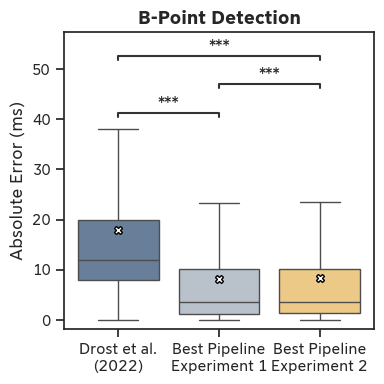

In [15]:
plot_data = best_models_data

pairs = [(row['A'], row['B']) for index, row in post_hoc_friedman[(post_hoc_friedman['A'] == 'Dro22') | (post_hoc_friedman['A'] == 'MinMax RFR Include NaN')].iterrows() if row['p-corr'] < 0.05]
pvalues = [row['p-corr'] for index, row in post_hoc_friedman[(post_hoc_friedman['A'] == 'Dro22') | (post_hoc_friedman['A'] == 'MinMax RFR Include NaN')].iterrows() if row['p-corr'] < 0.05]

fig, axs = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('none')
sns.boxplot(
    data=plot_data, 
    x="algorithm", 
    y="absolute_error", 
    hue="algorithm", 
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
)

annotator = Annotator(
    axs,
    pairs,
    data=plot_data,
    x='algorithm',
    y='absolute_error'
)

annotator.set_pvalues(pvalues)
annotator.configure(
    test='t-test_paired',
    pvalue_thresholds=custom_pvalue_thresholds,
    text_format='star' # Use stars for significance levels (*** for p<0.001, etc.)
)
annotator.annotate()

plt.ylabel("Absolute Error (ms)", fontdict={"size": 13})
axs.set_xticklabels(['Drost et al.\n(2022)', 'Best Pipeline\nExperiment 1', 'Best Pipeline\nExperiment 2'], fontdict={"size": 11.5})
plt.xlabel("")
plt.title("B-Point Detection", fontdict={"weight": "bold", "size": 14})
plt.tight_layout()
plt.savefig("C:/Users/sebas/OneDrive/Dokumente/Uni/Master/Research Internship/Paper/ML Paper/Figures/boxplot_algo_analysis.pdf", dpi=300, bbox_inches="tight", transparent=False)
plt.show()

### Evaluate statistical significance on three subsets
- Missing value inclusion
- Inter-rater agreement
- RR interval duration

#### Missing value inclusion
- no feature detection algorithm failed
- at least one feature detection algorithm failed

In [16]:
model_dict = {"MinMax_None_RFR_RR-Interval-Include-Nan_abs_error" :"MinMax RFR Include NaN"}
miss_value_analysis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
miss_value_analysis["subset"] = "All features detected"
mask_feature_detection_failed = miss_value_analysis['MinMax_KBest_RFR_RR-Interval_abs_error'].isna()
miss_value_analysis.loc[mask_feature_detection_failed, "subset"] = "Feature detection failed"
miss_value_analysis = miss_value_analysis.rename(columns=model_dict)
miss_value_analysis = miss_value_analysis.set_index(['subset'], append=True)
miss_value_analysis = miss_value_analysis[model_dict.values()]
miss_value_analysis_long = miss_value_analysis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")
miss_value_analysis_long

,participant,condition,phase,heartbeat_id_reference,subset,algorithm,absolute-error
0,GDN0005,Dummy,HoldingBreath,0,All features detected,MinMax RFR Include NaN,31.768000
1,GDN0005,Dummy,HoldingBreath,1,All features detected,MinMax RFR Include NaN,0.648000
2,GDN0005,Dummy,HoldingBreath,3,All features detected,MinMax RFR Include NaN,0.256000
3,GDN0005,Dummy,HoldingBreath,4,All features detected,MinMax RFR Include NaN,1.293600
4,GDN0005,Dummy,HoldingBreath,5,All features detected,MinMax RFR Include NaN,0.088444
...,...,...,...,...,...,...,...
11234,VP_032,tsst,Talk,39,All features detected,MinMax RFR Include NaN,0.040000
11235,VP_032,tsst,Talk,40,All features detected,MinMax RFR Include NaN,5.660000
11236,VP_032,tsst,Talk,41,All features detected,MinMax RFR Include NaN,15.168000
11237,VP_032,tsst,Talk,42,All features detected,MinMax RFR Include NaN,26.744000


In [17]:
miss_value_analysis_long[miss_value_analysis_long["subset"] == "All features detected"].describe()

,heartbeat_id_reference,absolute-error
count,10305.000000,10305.000000
mean,27.341679,7.757768
std,18.914244,11.424921
min,0.000000,0.000906
25%,11.000000,1.212388
50%,25.000000,3.260708
75%,41.000000,9.597985
max,97.000000,176.504471


In [18]:
miss_value_analysis_long[miss_value_analysis_long["subset"] == "Feature detection failed"].describe()

,heartbeat_id_reference,absolute-error
count,934.000000,934.000000
mean,27.520343,12.203157
std,19.660547,17.595886
min,0.000000,0.004000
25%,11.000000,2.441908
50%,26.000000,6.357265
75%,42.000000,14.737172
max,92.000000,189.486654


In [19]:
# 1. Test Normality for each subset
normality_results = pg.normality(
    data=miss_value_analysis_long[miss_value_analysis_long['algorithm'] == 'MinMax RFR Include NaN'],
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_results)

Normality Test Results per Subset:
                                  W          pval  normal
subset                                                  
All features detected     0.641935  2.187234e-90   False
Feature detection failed  0.616846  3.114437e-41   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10305.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Mann-Whitney U Test

In [20]:
mwu_results_feature_analysis = pg.pairwise_tests(
    data=miss_value_analysis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges' 
)
print("Pairwise pairwise test:\n", mwu_results_feature_analysis)

Pairwise pairwise test:
   Contrast                      A                         B  Paired  \
0   subset  All features detected  Feature detection failed   False   

   Parametric      U-val alternative         p-unc    hedges  
0       False  3739393.5   two-sided  1.293685e-29 -0.368639  


#### RR interval duration

In [21]:
lower_limit = 600
upper_limit = 1000
merged_ml_results_b_point = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_paper_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point['heart_rate_bpm_estimated'] = 60000 / merged_ml_results_b_point['rr_interval_ms_estimated']
group_low_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] < lower_limit
group_low_rr_interval = merged_ml_results_b_point.loc[group_low_rr_interval_mask]
group_medium_rr_interval_mask = ((merged_ml_results_b_point['rr_interval_ms_estimated'] >= lower_limit) & (merged_ml_results_b_point['rr_interval_ms_estimated'] <= upper_limit))
group_medium_rr_interval = merged_ml_results_b_point.loc[group_medium_rr_interval_mask]
group_high_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] > upper_limit
group_high_rr_interval = merged_ml_results_b_point.loc[group_high_rr_interval_mask]

lower_limit_bpm = 60
upper_limit_bpm = 100
group_low_bpm_interval_mask = merged_ml_results_b_point['heart_rate_bpm_estimated'] < lower_limit_bpm
group_low_bpm_interval = merged_ml_results_b_point.loc[group_low_bpm_interval_mask]
group_medium_bpm_interval_mask = ((merged_ml_results_b_point['heart_rate_bpm_estimated'] >= lower_limit_bpm) & (merged_ml_results_b_point['heart_rate_bpm_estimated'] <= upper_limit_bpm))
group_medium_bpm_interval = merged_ml_results_b_point.loc[group_medium_bpm_interval_mask]
group_high_bpm_interval_mask = merged_ml_results_b_point['heart_rate_bpm_estimated'] > upper_limit_bpm
group_high_bpm_interval = merged_ml_results_b_point.loc[group_high_bpm_interval_mask]

rr_interval_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
# rr_interval_analyis["subset"] = "Medium RR-Interval"
# rr_interval_analyis.loc[group_low_rr_interval_mask, "subset"] = "Low RR-Interval"
# rr_interval_analyis.loc[group_high_rr_interval_mask, "subset"] = "High RR-Interval"

rr_interval_analyis["subset"] = "Medium HR"
rr_interval_analyis.loc[group_low_bpm_interval_mask, "subset"] = "Low HR"
rr_interval_analyis.loc[group_high_bpm_interval_mask, "subset"] = "High HR"

rr_interval_analyis = rr_interval_analyis.rename(columns=algo_dict)
rr_interval_analyis = rr_interval_analyis.set_index(['subset'], append=True)
rr_interval_analyis = rr_interval_analyis[model_dict.values()]
rr_interval_analyis_long = rr_interval_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")

In [22]:
print(f"All heart rates: {merged_ml_results_b_point.shape[0]}")
print(f"Low RR-Interval heart rates: {group_low_rr_interval.shape[0]}")
print(f"Medium RR-Interval heart rates: {group_medium_rr_interval.shape[0]}")
print(f"High RR-Interval heart rates: {group_high_rr_interval.shape[0]}")

All heart rates: 11239
Low RR-Interval heart rates: 2483
Medium RR-Interval heart rates: 6552
High RR-Interval heart rates: 2103


In [23]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "Low HR"].describe()

,heartbeat_id_reference,absolute-error
count,2103.000000,2103.000000
mean,26.410842,8.951540
std,16.182784,12.329943
min,0.000000,0.002239
25%,12.000000,1.205874
50%,26.000000,3.784481
75%,40.000000,12.069897
max,74.000000,120.589972


In [24]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "Medium HR"].describe()

,heartbeat_id_reference,absolute-error
count,6653.000000,6653.000000
mean,28.053059,8.289765
std,19.943216,12.538745
min,0.000000,0.003245
25%,11.000000,1.273677
50%,25.000000,3.531482
75%,42.000000,10.321818
max,94.000000,189.486654


In [25]:
rr_interval_analyis_long[rr_interval_analyis_long["subset"] == "High HR"].describe()

,heartbeat_id_reference,absolute-error
count,2483.000000,2483.000000
mean,26.291180,6.993418
std,18.427204,10.632243
min,0.000000,0.000906
25%,11.000000,1.287923
50%,23.000000,3.223583
75%,41.000000,7.938912
max,97.000000,144.458321


In [26]:
normality_rr_interval = pg.normality(
    data=rr_interval_analyis_long,
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_rr_interval)

Normality Test Results per Subset:
                   W          pval  normal
subset                                   
Medium HR  0.616675  3.166967e-81   False
Low HR     0.701826  1.252640e-51   False
High HR    0.603643  7.137103e-60   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6653.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Kruskal-Wallis H-test

In [27]:
# Kruskal-Wallis H-test
kruskal_results_rr_interval = pg.kruskal(
    data=rr_interval_analyis_long, 
    dv='absolute-error', 
    between='subset'
)
print("Kruskal-Wallis H-test Results:\n", kruskal_results_rr_interval)

post_hoc_kruskal_rr_interval = pg.pairwise_tests(
    data=rr_interval_analyis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges'  
)
print("Non-Parametric Post-Hoc Results (MWU):\n", post_hoc_kruskal_rr_interval)

Kruskal-Wallis H-test Results:
          Source  ddof1          H     p-unc
Kruskal  subset      2  13.502889  0.001169
Non-Parametric Post-Hoc Results (MWU):
   Contrast        A          B  Paired  Parametric      U-val alternative  \
0   subset  High HR     Low HR   False       False  2456571.5   two-sided   
1   subset  High HR  Medium HR   False       False  7922013.5   two-sided   
2   subset   Low HR  Medium HR   False       False  7124400.5   two-sided   

      p-unc    p-corr p-adjust    hedges  
0  0.000553  0.001659     bonf -0.171106  
1  0.002604  0.007813     bonf -0.107567  
2  0.202527  0.607580     bonf  0.052984  


#### Inter-rater agreement

In [28]:
inter_rater_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
inter_rater_agreement = pd.read_csv(data_path.joinpath("inter_rater_agreement.csv"), index_col=[0,1,2,3])
joinable_ids = inter_rater_analyis.index.intersection(inter_rater_agreement.index)
inter_rater_analyis.loc[joinable_ids, 'Agreement'] = inter_rater_agreement.loc[joinable_ids]['Agreement']
inter_rater_analyis = inter_rater_analyis.rename(columns={'Agreement': 'subset'})
inter_rater_analyis = inter_rater_analyis.rename(columns=algo_dict)
inter_rater_analyis = inter_rater_analyis.set_index(['subset'], append=True)
general_inter_rater_analysis = inter_rater_analyis
inter_rater_analyis = inter_rater_analyis[model_dict.values()]
inter_rater_analyis_long = inter_rater_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "subset"], var_name="algorithm", value_name="absolute-error")

#### Compute the performance of the best traditional algorithm (Drost2022) per Inter-Rater Agreement

In [29]:
drost2022_inter_rater_analysis = general_inter_rater_analysis["Dro22"].reset_index().set_index(['participant', 'condition', 'phase', 'heartbeat_id_reference'])
drost2022_inter_rater_analysis[drost2022_inter_rater_analysis["subset"] == "Low Agreement"].describe()

,Dro22
count,1829.000000
mean,21.624385
std,27.659869
min,0.000000
25%,8.000000
50%,13.000000
75%,32.000000
max,374.000000


In [30]:
drost2022_inter_rater_analysis[drost2022_inter_rater_analysis["subset"] == "Medium Agreement"].describe()

,Dro22
count,1889.000000
mean,19.856538
std,19.848874
min,0.000000
25%,9.000000
50%,16.000000
75%,24.000000
max,278.000000


In [31]:
drost2022_inter_rater_analysis[drost2022_inter_rater_analysis["subset"] == "High Agreement"].describe()

,Dro22
count,7193.000000
mean,16.105797
std,20.669806
min,0.000000
25%,8.000000
50%,12.000000
75%,18.000000
max,452.000000


In [32]:
drost2022_inter_rater_analysis.describe()

,Dro22
count,11239.000000
mean,17.926862
std,23.016958
min,0.000000
25%,8.000000
50%,12.000000
75%,20.000000
max,452.000000


#### Compute the performance of the best ML Pipeline per Inter-Rater Agreeement

In [33]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "Low Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,1829.000000,1829.000000
mean,26.685621,15.170114
std,18.066832,13.759521
min,0.000000,0.004000
25%,11.000000,4.538770
50%,25.000000,11.335725
75%,39.000000,21.949076
max,83.000000,93.189325


In [34]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "Medium Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,1889.000000,1889.000000
mean,25.408152,9.006435
std,18.111184,12.764573
min,0.000000,0.008000
25%,10.000000,2.012000
50%,23.000000,4.808000
75%,38.000000,11.160376
max,82.000000,189.486654


In [35]:
inter_rater_analyis_long[inter_rater_analyis_long["subset"] == "High Agreement"].describe()

,heartbeat_id_reference,absolute-error
count,7193.000000,7193.000000
mean,28.028083,5.858362
std,19.450939,9.934187
min,0.000000,0.000906
25%,11.000000,0.968000
50%,26.000000,2.256201
75%,42.000000,6.303292
max,97.000000,148.324709


In [36]:
inter_rater_analyis_long.describe()

,heartbeat_id_reference,absolute-error
count,11239.000000,11239.000000
mean,27.356526,8.127195
std,18.976546,12.119868
min,0.000000,0.000906
25%,11.000000,1.263296
50%,25.000000,3.485674
75%,41.000000,10.086356
max,97.000000,189.486654


In [37]:
normality_inter_rater_agreement = pg.normality(
    data=inter_rater_analyis_long,
    dv='absolute-error',
    group='subset'
)
print("Normality Test Results per Subset:\n", normality_inter_rater_agreement)

Normality Test Results per Subset:
                          W          pval  normal
subset                                          
High Agreement    0.552552  1.379521e-86   False
Low Agreement     0.868400  1.076948e-36   False
Medium Agreement  0.601479  1.716890e-54   False


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7193.
  res = hypotest_fun_out(*samples, **kwds)


Normality is violated --> Perform Kruskal-Wallis H-test

In [38]:
# Kruskal-Wallis H-test
kruskal_results_inter_rater = pg.kruskal(
    data=inter_rater_analyis_long, 
    dv='absolute-error', 
    between='subset'
)
print("Kruskal-Wallis H-test Results:\n", kruskal_results_inter_rater)

post_hoc_kruskal_inter_rater = pg.pairwise_tests(
    data=inter_rater_analyis_long, 
    dv='absolute-error', 
    between='subset', 
    parametric=False, # Forces Mann-Whitney U Test
    padjust='bonf',   
    effsize='hedges'  
)
print("Non-Parametric Post-Hoc Results (MWU):\n", post_hoc_kruskal_inter_rater)

Kruskal-Wallis H-test Results:
          Source  ddof1            H          p-unc
Kruskal  subset      2  1425.808021  2.453139e-310
Non-Parametric Post-Hoc Results (MWU):
   Contrast               A                 B  Paired  Parametric      U-val  \
0   subset  High Agreement     Low Agreement   False       False  3021171.0   
1   subset  High Agreement  Medium Agreement   False       False  4991914.5   
2   subset   Low Agreement  Medium Agreement   False       False  2309749.5   

  alternative          p-unc         p-corr p-adjust    hedges  
0   two-sided  4.380322e-280  1.314097e-279     bonf -0.860592  
1   two-sided   1.259210e-70   3.777631e-70     bonf -0.297378  
2   two-sided   7.883445e-71   2.365033e-70     bonf  0.464621  


### Plot the results of the subset analysis

In [39]:
def plot_inter_feature(axs):
    sns.boxplot(
    data=miss_value_analysis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False, 
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )

    # --- Step 3: Add the Significance Bracket using statannotations ---
    # Define the pair you want to compare on the plot
    pairs = [('All features detected', 'Feature detection failed')]

    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=miss_value_analysis_long,
        x='subset',
        y='absolute-error'
    )

    p_values = [row['p-unc'] for index, row in mwu_results_feature_analysis.iterrows() if row['p-unc'] < 0.05]
    p_values = mwu_results_feature_analysis['p-unc']
    print(p_values[0])
    # Pass the p-value to the annotator and draw the bracket
    annotator.set_pvalues([p_values[0]])
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("a) Feature Detection Performance", fontdict={"weight": "bold", "size": 15})
    axs.set_title("(a) Feature Detection Performance", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels(['Complete Feature Set', '>= 1 Missing Feature'], fontdict={"size": 13})

def plot_inter_rr_interval(axs):
    sns.boxplot(
    data=rr_interval_analyis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    order=["Low HR", "Medium HR", "High HR"]
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=rr_interval_analyis_long,
        x='subset',
        y='absolute-error'
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("c) RR interval Duration", fontdict={"weight": "bold", "size": 15})
    axs.set_title("(c) Heart Rate", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    r'Low' + ' HR' + '\n' + r'[0, 60) bpm', 
    r'Medium' + ' HR' + '\n' + r'[60, 100] bpm', 
    r'High' + ' HR' + '\n' + r'[100, $\infty$) bpm'
    # r'Low' + '\n' + 'RR interval' + '\n' + r'[0, 600) ms', 
    # r'Medium' + '\n' + 'RR interval' + '\n' + r'[600, 1000] ms', 
    # r'High' + '\n' + 'RR interval' + '\n' + r'[1000, $\infty$) ms'
], fontdict={"size": 13})

def plot_inter_rater(axs):
    sns.boxplot(
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
        ax=axs,
        hue='subset',
        hue_order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        legend=False,
        showfliers=False,
        showmeans=True,
        meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("b) Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_title("(b) Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    # r'Low Agreement' + '\n' + r'$\Delta r > 10$ ms', 
    # r'Medium Agreement' + '\n' + r'$4 \text{ ms} \leq \Delta r \leq 10$ ms', 
    # r'High Agreement' + '\n' + r'$\Delta r < 4$ ms'
    r'Low' + '\n' + 'Agreement' + '\n' + r'(10, $\infty$) ms', 
    r'Medium' + '\n' + 'Agreement' + '\n' + r'[4, 10] ms', 
    r'High' + '\n' + 'Agreement' + '\n' + r'[0, 4) ms'
], fontdict={"size": 13})



1.293685103770761e-29
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

All features detected vs. Feature detection failed: Custom statistical test, P_val:1.294e-29
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

High Agreement vs. Low Agreement: Custom statistical test, P_val:1.314e-279
Low Agreement vs. Medium Agreement: Custom statistical test, P_val:2.365e-70


c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_14624\3595741672.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['Complete Feature Set', '>= 1 Missing Feature'], fontdict={"size": 13})
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "


High Agreement vs. Medium Agreement: Custom statistical test, P_val:3.778e-70
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Low HR vs. High HR: Custom statistical test, P_val:1.659e-03
Medium HR vs. High HR: Custom statistical test, P_val:7.813e-03


C:\Users\sebas\AppData\Local\Temp\ipykernel_14624\3595741672.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\statannotations\Annotator.py:825: UserWarning: Annotator was reconfigured without applying the test (again) which will probably lead to unexpected results
  warnings.warn("Annotator was reconfigured without applying the "
C:\Users\sebas\AppData\Local\Temp\ipykernel_14624\3595741672.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([


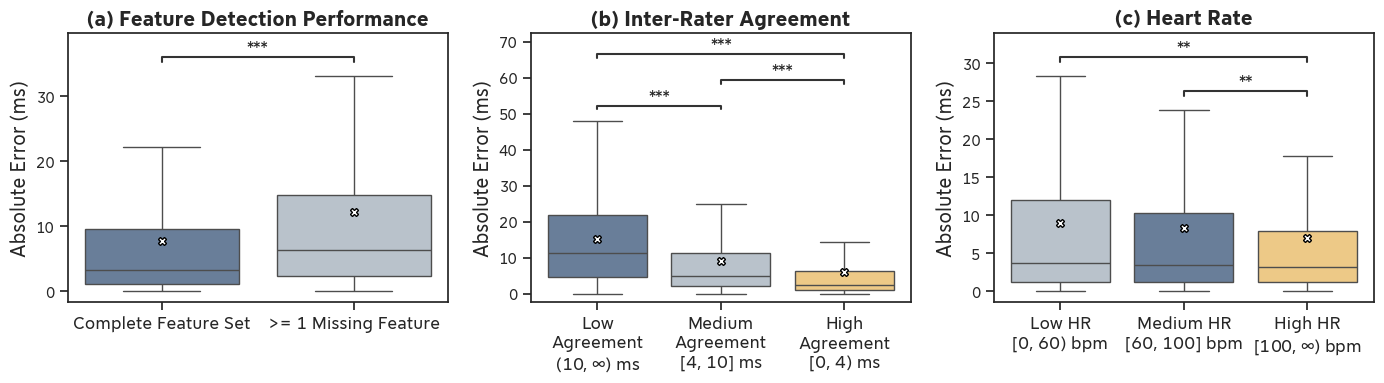

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
fig.patch.set_facecolor('none')
axs[0] = plot_inter_feature(axs=axs[0])
axs[1] = plot_inter_rater(axs=axs[1])
axs[2] = plot_inter_rr_interval(axs=axs[2])
plt.savefig("C:/Users/sebas/OneDrive/Dokumente/Uni/Master/Research Internship/Paper/ML Paper/Figures/best_ml_pipeline_subset_analysis.svg", dpi=300, bbox_inches="tight", transparent=False)
fig.tight_layout()

In [43]:
rr_interval_analyis_long

,participant,condition,phase,heartbeat_id_reference,subset,algorithm,absolute-error
0,GDN0005,Dummy,HoldingBreath,0,Medium HR,MinMax RFR Include NaN,31.768000
1,GDN0005,Dummy,HoldingBreath,1,Medium HR,MinMax RFR Include NaN,0.648000
2,GDN0005,Dummy,HoldingBreath,3,Medium HR,MinMax RFR Include NaN,0.256000
3,GDN0005,Dummy,HoldingBreath,4,Medium HR,MinMax RFR Include NaN,1.293600
4,GDN0005,Dummy,HoldingBreath,5,Medium HR,MinMax RFR Include NaN,0.088444
...,...,...,...,...,...,...,...
11234,VP_032,tsst,Talk,39,Medium HR,MinMax RFR Include NaN,0.040000
11235,VP_032,tsst,Talk,40,Medium HR,MinMax RFR Include NaN,5.660000
11236,VP_032,tsst,Talk,41,Medium HR,MinMax RFR Include NaN,15.168000
11237,VP_032,tsst,Talk,42,Medium HR,MinMax RFR Include NaN,26.744000


In [44]:
def plot_inter_feature(axs):
    sns.boxplot(
    data=miss_value_analysis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False, 
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )

    # --- Step 3: Add the Significance Bracket using statannotations ---
    # Define the pair you want to compare on the plot
    pairs = [('All features detected', 'Feature detection failed')]

    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=miss_value_analysis_long,
        x='subset',
        y='absolute-error'
    )

    p_values = [row['p-unc'] for index, row in mwu_results_feature_analysis.iterrows() if row['p-unc'] < 0.05]
    p_values = mwu_results_feature_analysis['p-unc']
    print(p_values[0])
    # Pass the p-value to the annotator and draw the bracket
    annotator.set_pvalues([p_values[0]])
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("a) Feature Detection Performance", fontdict={"weight": "bold", "size": 15})
    axs.set_title("Feature Detection Performance", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels(['All features detected', 'Feature detection failed'], fontdict={"size": 13})

def plot_inter_rr_interval(axs):
    sns.boxplot(
    data=rr_interval_analyis_long,
    x='subset',
    y='absolute-error',
    ax=axs,
    hue='subset',
    showfliers=False,
    showmeans=True,
    meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    order=["Low RR-Interval", "Medium RR-Interval", "High RR-Interval"]
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_rr_interval.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=rr_interval_analyis_long,
        x='subset',
        y='absolute-error'
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("c) RR interval Duration", fontdict={"weight": "bold", "size": 15})
    axs.set_title("RR interval Duration", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    # r'Low RR interval' + '\n' + r'$RR < 600 \text{ ms}$', 
    # r'Medium RR interval' + '\n' + r'$600 \text{ ms} \leq RR \leq 1000 \text{ ms}$', 
    # r'High RR interval' + '\n' + r'$RR > 1000 \text{ ms}$'
    r'Low' + '\n' + 'RR interval' + '\n' + r'[0, 600) ms', 
    r'Medium' + '\n' + 'RR interval' + '\n' + r'[600, 1000] ms', 
    r'High' + '\n' + 'RR interval' + '\n' + r'[1000, $\infty$) ms'
], fontdict={"size": 13})

def plot_inter_rater(axs):
    sns.boxplot(
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
        ax=axs,
        hue='subset',
        hue_order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        order=['Low Agreement', 'Medium Agreement', 'High Agreement'],
        legend=False,
        showfliers=False,
        showmeans=True,
        meanprops={"marker":"X", "markeredgecolor":"#000000", "markerfacecolor":"#FFFFFF"},
    )


    pairs = [(row['A'], row['B']) for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    p_values = [row['p-corr'] for index, row in post_hoc_kruskal_inter_rater.iterrows() if row['p-corr'] < 0.05]
    # Create and configure the annotator
    annotator = Annotator(
        axs,
        pairs,
        data=inter_rater_analyis_long,
        x='subset',
        y='absolute-error',
    )

    annotator.set_pvalues(pvalues=p_values)
    annotator.configure(
        text_format='star',
        pvalue_thresholds=custom_pvalue_thresholds,
    ).annotate()
    axs.set_xlabel("")
    axs.set_ylabel("Absolute Error (ms)", fontdict={"size": 14.5})
    # axs.set_title("b) Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_title("Inter-Rater Agreement", fontdict={"weight": "bold", "size": 15})
    axs.set_xticklabels([
    # r'Low Agreement' + '\n' + r'$\Delta r > 10$ ms', 
    # r'Medium Agreement' + '\n' + r'$4 \text{ ms} \leq \Delta r \leq 10$ ms', 
    # r'High Agreement' + '\n' + r'$\Delta r < 4$ ms'
    r'Low' + '\n' + 'Agreement' + '\n' + r'(10, $\infty$) ms', 
    r'Medium' + '\n' + 'Agreement' + '\n' + r'[4, 10] ms', 
    r'High' + '\n' + 'Agreement' + '\n' + r'[0, 4) ms'
], fontdict={"size": 13})

